In [1]:
import pandas as pd, numpy as np
from matplotlib import pyplot as plt

In [5]:

from ast import literal_eval
## converting string of tuple when importing csv avoiding literal eval on nan cells
def _converting(cell):
    if cell.startswith('(') :
        return literal_eval(cell)

In [6]:
df = pd.read_csv("results/01_zincToks.csv", converters={'tokens':_converting})

In [8]:
df

,smiles,tokens,nToks
0,CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1,"(F, <5>, c1ccccc1, <0>, N, C=O, C, <6>, c1ccc2...",18
1,C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1,"(C, <0S>, C1CCCCC1, <2>, <4S>, (, C, ), N, <1>...",16
2,N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)...,"(C1CCNC1, <3>, C=O, C|R, (, <0>, c1ccccc1, ), ...",16
3,CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c...,"(C, C, O, C=O, <1R>, C1CCNCC1, <3>, C=O, <0>, ...",15
4,N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C(O)[C@H](C#N)C...,"(O, <4>, C1=CC2(CC=N1)CCCCC2, <0>, <1>, (, C#N...",20
...,...,...,...
249323,CC1(C)CC[C@H](CNC(=O)Cn2ncc3ccccc3c2=O)c2ccccc21,"(C, <6>, c1ccc2c(c1)CCCC2, <9S>, <6>, (, C, ),...",14
249324,Cn1ccnc1C(=O)c1ccc(NC(=O)C2CCN(C(=O)C(C)(C)C)C...,"(C, C, (, C, ), (, C, ), C=O, <3>, C1CCNCC1, <...",22
249325,Cc1ccc(NC(=O)C(=O)N(C)Cc2ccccc2)c(C)c1,"(c1ccccc1, <0>, C, N, (, C, ), C=O, C=O, N, <3...",18
249326,Cc1cc(C(=O)Nc2ccc(OCC(N)=O)cc2)c(C)n1C1CC1,"(C, <2>, c1cc[nH]c1, <0>, <4>, (, C, ), <3>, (...",22


In [9]:
_dict=df["nToks"].describe().to_dict()

In [10]:
iqr=_dict["75%"]-_dict["25%"]
_dict["lowerWisk"]= 3 #_dict["25%"]-1.5*iqr -> rounded to 3
_dict["upperWisk"]= 30 # _dict["75%"]+1.5*iqr -> rounded to 30

In [11]:
_dict

{'count': 249328.0,
 'mean': 16.712374863633446,
 'std': 4.855034526776576,
 'min': 3.0,
 '25%': 13.0,
 '50%': 16.0,
 '75%': 20.0,
 'max': 51.0,
 'lowerWisk': 3,
 'upperWisk': 30}

In [12]:
## Data for compactness employed by work of Group SELFIES
benchM=pd.read_csv("data/compactnessBenchmarking.csv", index_col=0)

(0.0, 80.0)

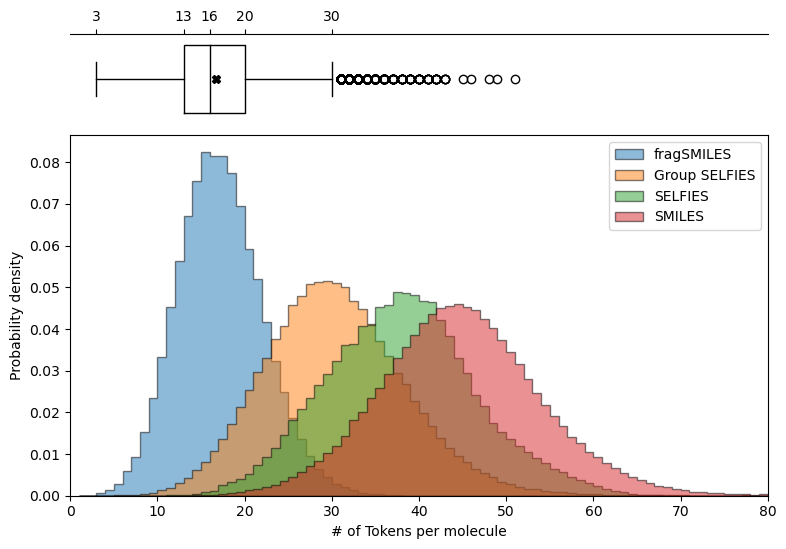

In [13]:
fig, ax = plt.subplots(
    2, figsize=(9, 6), sharex=False,
    gridspec_kw={"height_ratios": (.2, .8), "hspace":.05}
)

################################
# Boxplot #
color={'color': 'black'}
meanprops={'markerfacecolor': 'black', "marker":"X", 'markeredgecolor': 'black'}
boxP=ax[0].boxplot(df["nToks"], vert=False, showmeans=True, manage_ticks=True, medianprops=color, meanprops=meanprops)

# removing borders
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].xaxis.set_label_position('top')

values = np.array([boxP["whiskers"][i].get_xdata() for i in [0,1]], dtype=int).flatten()
values = sorted(values.tolist() + [int(df["nToks"].median())])
ax[0].set_xticks( values, labels=values )
ax[0].xaxis.tick_top()

ax[0].set_yticks([])
ax[0].set_ylim([0.9,1.1])
#################################

# Histogram
fixedKw=dict(fill=True, density=True, bins=np.array(range(1, 121)),
            histtype='stepfilled', alpha=0.5, ec="black")

ax[1].hist(df["nToks"], 
           # hatch="+", 
           # facecolor="grey",
           label="fragSMILES",
           **fixedKw
          )

for bench in ["Group SELFIES", "SELFIES", "SMILES"]:
    ax[1].hist(benchM.query("Type==@bench").iloc[...,1], 
               label=bench,
              **fixedKw
              )

ax[1].set_xlabel("# of Tokens per molecule")
ax[1].set_ylabel('Probability density')
ax[1].legend()
#################

ax[1].set_xlim([0, 80])
ax[1].set_xticks( np.array(range(0,81,10)) )
ax[1].xaxis.set_tick_params(labelbottom=True)
ax[0].set_xlim([0,80])